__Eithar Elfatih Burie Abdelrahman DS2403__

# Global Power Plant Database

# __ Problem Identification__

__Project Description__
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

__Key attributes of the database__
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

__Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw__

Hint : Use pandas methods to combine all the datasets and then start working on this project.


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database




__________________________

# Import necessary libraries

In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVR 
from scipy.stats import skew, stats, boxcox,yeojohnson
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#read dataset
URL=r'C:\\Users\\eitha\\OneDrive\\Documents\\data science\\datatrained\\flip robo internship\\evaluation projects\\database_IND.csv'
gpp_=pd.read_csv(URL)


_______

__Head / Tail__

In [3]:
#create dataframe of csv
df=pd.DataFrame(gpp_)
df.index=df.index+1

#show max
pd.set_option('Display.max_columns', None)

#show dataset head 
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
1,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
5,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#show dataset tail
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we have a brief idea about the size and layout of the dataset.

# Exploratory Data Analysis

__Data Structure__

Size, Shape and Columns  

In [5]:
# show size/shapecolumns of our dataset.
print('The dataset has a size of:',df.size)
print('The dataset has a shape:',df.shape)
print('The dataset has a set of columns:',df.columns)

The dataset has a size of: 24489
The dataset has a shape: (907, 27)
The dataset has a set of columns: Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


__Info__

In [6]:
#Show information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 1 to 907
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

__DataType__

In [7]:
# show data types sorted
print('The data type of each column is as follows:\n')
print(df.dtypes.sort_values())

The data type of each column is as follows:

estimated_generation_gwh    float64
generation_gwh_2019         float64
generation_gwh_2018         float64
generation_gwh_2017         float64
capacity_mw                 float64
latitude                    float64
longitude                   float64
generation_gwh_2016         float64
generation_gwh_2015         float64
generation_gwh_2014         float64
other_fuel3                 float64
commissioning_year          float64
generation_gwh_2013         float64
year_of_capacity_data       float64
wepp_id                     float64
country                      object
url                          object
generation_data_source       object
owner                        object
other_fuel2                  object
other_fuel1                  object
primary_fuel                 object
gppd_idnr                    object
name                         object
country_long                 object
geolocation_source           object
source             

After checking the basic information of our dataset, we can observe the following: 

- The data set is large consisting of 907 rows and 27 columns. 
- There is a mix of data types: float64 and object so we are working with both numerical and categorical data
- There is a large amount of null values that need addressing to continue with our project efficiently 

In the problem statement at the beginning of this project, it is clearly stated that we must approach this project as both a regression problem and a clssification problem respectively. For our regression problem I will be using __'capaciy_mw'__ as the target feature , and for our classification problem we will be using __'primary_fuel'__ as the target feature.

I will first look at the data as a whole and then seperately appraoch each problem.

#  Objectives

- __The goal of this project is__ 
- __The goal of this project is__ 

__Numerical features :__ 

- commissioning_year        >>> Numerical
- estimated_generation_gwh  >>> Numerical
- generation_gwh_2019       >>> Numerical
- generation_gwh_2017       >>> Numerical
- generation_gwh_2016       >>> Numerical
- generation_gwh_2015       >>> Numerical
- generation_gwh_2014       >>> Numerical
- generation_gwh_2013       >>> Numerical
- latitude                  >>> Numerical
- longitude                 >>> Numerical
- other_fuel3               >>> Numerical  (should be numerical)
- year_of_capacity_data     >>> Numerical
- wepp_id                   >>> Numerical

___________________________________________________________________

__Categorical features :__ 

- country                    >>> Categorical
- country_long               >>> Categorical
- generation_data_source     >>> Categorical
- geolocation_source         >>> Categorical
- gppd_idnr                  >>> Categorical
- name                       >>> Categorical
- other_fuel1                >>> Categorical
- other_fuel2                >>> Categorical
- owner                      >>> Categorical
- primary_fuel               >>> Categorical
- source                     >>> Categorical
- url                        >>> Categorical

__Target Features:__

- capacity_mw               float64  >>> (Numerical)
- primary_fuel               object  >>> (Categorical)

__Reorder Columns__

In [8]:
#move Targets to first columns
# list of columns 
cols_=list(df.columns)

cols_.remove('capacity_mw')
cols_.remove('primary_fuel')
order_=['capacity_mw', 'primary_fuel'] + cols_

df_=df[order_]

df_

,capacity_mw,primary_fuel,country,country_long,name,gppd_idnr,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
1,2.5,Solar,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98.0,Coal,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.2,Wind,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135.0,Gas,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
5,1800.0,Coal,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,Coal,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
904,3.0,Solar,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,Wind,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,Coal,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Define Feature Categories__

In [9]:
# create categorical and numerical list (without targets)
num_cols=[]
cat_cols=[]

for col in df_.dtypes.index:
    if col =='capacity_mw'or col == 'primary_fuel':
        continue
    if df_.dtypes[col] in ['float64']:
        num_cols.append(col)
    elif df_.dtypes[col] in ['object']:
        cat_cols.append(col)
        
print(f'Numerical columns: \n{num_cols}')
print(len(num_cols))
print(f'\nCategorical columns:\n {cat_cols}')    
print(len(cat_cols))

Numerical columns: 
['latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']
14

Categorical columns:
 ['country', 'country_long', 'name', 'gppd_idnr', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
11


__________________________

__Data Pre-processing__ 


__Duplicates__


In [10]:
#indentify amount of duplicates (if any)
print('From this, we can see there are no duplicates in this data set.')
df_.duplicated().sum()

From this, we can see there are no duplicates in this data set.


0

__Missing Values__

In [11]:
# sum of missing values in data set 
print('From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute')
df_.isnull().sum().sum()

From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute


10445

__Heatmap of nulls__

<Axes: >

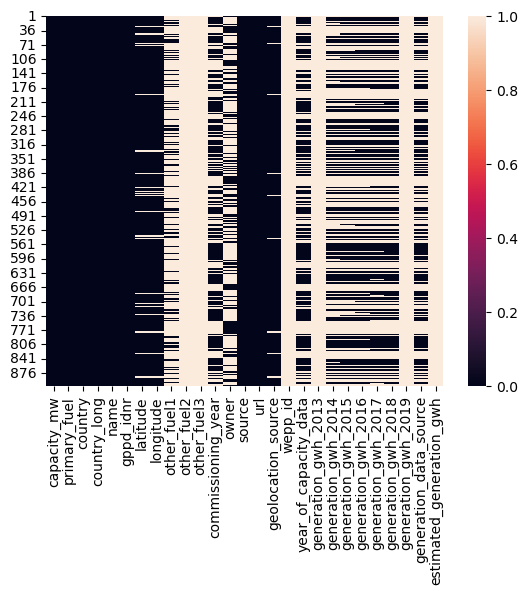

In [12]:
sns.heatmap(df_.isna())

- There is a significant amount of missing data.

__NULL VALUE SORTING__

In [15]:
#create dataframe of missing values 
missing_=df_.isnull().sum()

missing_=missing_[missing_>0]

missing_per=round(missing_/len(df_)*100,2)

unique_c= df_.nunique()
           
missing_df=pd.DataFrame({'Column Name': missing_.index,
                         'Missing Values': missing_.values,
                         'Missing Value %':missing_per,
                         'Unique Values':missing_.index.map(unique_c),
                         'Type': ['Numerical' if df_[col].dtype in ('int64', 'float64') else 'Categorical' for col in missing_.index]})

missing_df=missing_df.sort_values(by=['Type' ,'Missing Values'], ascending=[False, False]).reset_index(drop=True)

missing_df

,Column Name,Missing Values,Missing Value %,Unique Values,Type
0,other_fuel3,907,100.00,0,Numerical
1,wepp_id,907,100.00,0,Numerical
2,generation_gwh_2013,907,100.00,0,Numerical
3,generation_gwh_2019,907,100.00,0,Numerical
4,estimated_generation_gwh,907,100.00,0,Numerical
5,generation_gwh_2014,509,56.12,371,Numerical
6,generation_gwh_2015,485,53.47,396,Numerical
7,generation_gwh_2016,473,52.15,403,Numerical
8,generation_gwh_2017,467,51.49,408,Numerical
9,generation_gwh_2018,459,50.61,410,Numerical


- To look at in more detail, I will seperatly look into numerical and categorical features 

__Numerical features null sorting__

In [16]:
print( 'The amount of null values in num_cols is:', df_[num_cols].isna().sum().sum())

The amount of null values in num_cols is: 7788



- __'other_fuel3',
    'wepp_id',
    'generation_gwh_2013',
    'generation_gwh_2019',
    'estimated_generation_gwh'__ all have a complete set of null values
- As this would give bias if imputed with median or mode, the bove features will be dropped.

- __'generation_gwh_2018',
    'generation_gwh_2017',
    'generation_gwh_2016',
    'generation_gwh_2015',
    'generation_gwh_2014'__ , have a large amount of null values but also have many unique values.
    - Again imputing such a large amount of data would create bias, so these will also be dropped.
    
- __'year_of_capacity_data'__ has only 1 unique value, and 388 null values. 
- As almost half of the data is missing, I think it is also safe to drop this column.


In [17]:
# from the above findings, i will dropp the unnecessary columns and explore further the rest of the num values 
drop_cols_num=['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh',
           'generation_gwh_2018', 'generation_gwh_2017', 'generation_gwh_2016', 'generation_gwh_2015',
           'generation_gwh_2014', 'year_of_capacity_data']


    

__Categorical features null sorting__

In [18]:
print( 'The amount of null values in cat_cols is:', df_[cat_cols].isna().sum().sum())

The amount of null values in cat_cols is: 2657


- The features :
    - __'other_fuel2'__ has 906 out of 907 values missing.  This is almost 100% of the data so this can be dropped.
    - __'other_fuel1'__ also as a high number of missing values .i can see it has 3 unique values. From this i can say that the three features seem to aim to have this information but is insufficient in them all. this can also be dropped.
    'country_long', 'generation_data_source'__ are columns that identify each individual row, they do not aid in our investigation.




-  __'name' and 'gppd_idnr'__ have the same value throughout the columns, which is unusefule to our data analysis
- __'other_fuel1'__, has 3 unique values, however the majority of the data is null

In [19]:
drop_cols_cat=['generation_data_source','other_fuel1','other_fuel2']

In [20]:
#drop columns
drop_cols = drop_cols_num + drop_cols_cat
df_d=df_.drop(columns=(drop_cols))

df_d


,capacity_mw,primary_fuel,country,country_long,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source
1,2.5,Solar,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
2,98.0,Coal,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
3,39.2,Wind,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
4,135.0,Gas,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI
5,1800.0,Coal,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,Coal,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI
904,3.0,Solar,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
905,25.5,Wind,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
906,80.0,Coal,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


__Update numerical and categorical list__

In [21]:
# Re-select numerical columns after dropping
num_cols = df_d.select_dtypes(include=['number']).columns.tolist()

# Re-select categorical columns after dropping
cat_cols = df_d.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude any specific columns if necessary
# For example, if you want to exclude 'capacity_mw' from num_cols and 'primary_fuel' from cat_cols:
num_cols = [col for col in num_cols if col not in ['capacity_mw']]
cat_cols = [col for col in cat_cols if col not in ['primary_fuel']]

# Print the updated lists
print("Numerical Columns:", num_cols)
print("Number of Numerical Columns:", len(num_cols))

print("Categorical Columns:", cat_cols)
print("Number of Categorical Columns:", len(cat_cols))

Numerical Columns: ['latitude', 'longitude', 'commissioning_year']
Number of Numerical Columns: 3
Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'owner', 'source', 'url', 'geolocation_source']
Number of Categorical Columns: 8


In [22]:
#update num cols
num_cols=df_d.select_dtypes(include=['float64']).columns.tolist()
num_cols=[col for col in num_cols if col not in ['capacity_mw']]
print(num_cols)
print(len(num_cols))   

cat_cols=df_d.select_dtypes(include=['object']).columns.tolist()
cat_cols=[col for col in cat_cols if col not in ['primary_fuel']]
print(cat_cols)
print(len(cat_cols)) 



['latitude', 'longitude', 'commissioning_year']
3
['country', 'country_long', 'name', 'gppd_idnr', 'owner', 'source', 'url', 'geolocation_source']
8


<Axes: >

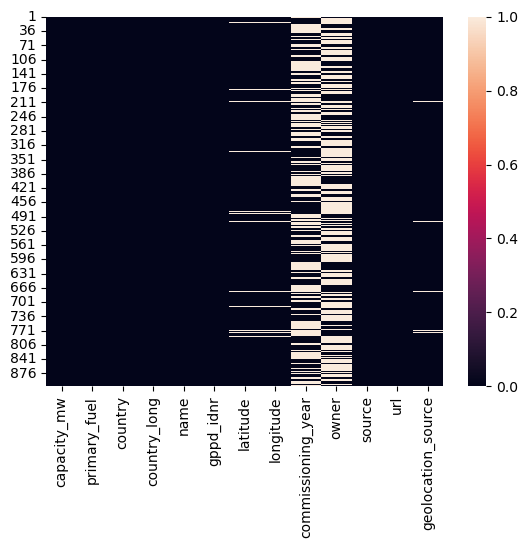

In [23]:
sns.heatmap(df_d.isna())

-There are still so null values, but has dropped significantly after dropping columns.


action 
- investing the rest of null values.

In [24]:
print( 'The amount of null values in was:', df_.isna().sum().sum())
print( '\nThe amount of null values after dropping columns is now:', df_d.isna().sum().sum())

The amount of null values in was: 10445

The amount of null values after dropping columns is now: 1056


__Summary of data reading__

- Data set (after dropping irrelevent features) has 907 rows and 13 columns.
- All columns are of type float64' or 'object'. There is both numerical and categorical data.
- There are no duplicates.
- There were many null values, i have dropped ones i cant impute with data and I will further explore the rest.
- 'primary_fuel' and 'capacity_mw' are our target variables. The 11 other variables are independent.


__Feature Analysis__

__Nulls__

In [25]:
#create dataframe of missing values left in nuw dataframe
missing_2=df_d.isnull().sum()

missing_2=missing_2[missing_2>0]

missing_per2=round(missing_2/len(df_d)*100,2)

unique_c2= df_d.nunique()
           
missing_df2=pd.DataFrame({'Column Name': missing_2.index,
                         'Missing Values': missing_2.values,
                         'Missing Value %':missing_per2,
                         'Unique Values':missing_2.index.map(unique_c2),
                         'Type': ['Numerical' if col in num_cols else 'Categorical' for col in missing_2.index]})

missing_df2=missing_df2.sort_values(by=['Type' ,'Missing Values'], ascending=[False, False]).reset_index(drop=True)

missing_df2

,Column Name,Missing Values,Missing Value %,Unique Values,Type
0,commissioning_year,380,41.90,73,Numerical
1,latitude,46,5.07,836,Numerical
2,longitude,46,5.07,827,Numerical
3,owner,565,62.29,280,Categorical
4,geolocation_source,19,2.09,3,Categorical


1. geolocation_source'

In [29]:
# geolocation_source
print(f'The missing values in geolocation_source:{df_d["geolocation_source"].isnull().sum()}')



The missing values in geolocation_source:19


In [30]:
#calculate mode
mode_geo=df_d['geolocation_source'].mode()[0]

#impute with mode
df_d['geolocation_source'].fillna(mode_geo, inplace=True)

# as there are only 19/907 nulls for this feature, a good way to impute these values is the mode
print(f'The missing values in geolocation_source after imputation:{df_d["geolocation_source"].isnull().sum()}')



The missing values in geolocation_source after imputation:0


______________________

2. longitude and latitude

In [31]:
# count null rows in 'latitude' and 'longitude'
null_lat_long=df_d[df_d['latitude'].isna() & df_d['longitude'].isna()].shape[0]
print(f"Rows with nulls in 'latitude' and 'longitude': {null_lat_long}")
print('Percentage of missing data = ',((null_lat_long/len(df_)*100)))

Rows with nulls in 'latitude' and 'longitude': 46
Percentage of missing data =  5.071664829106946


- as this is a very low percentage of data i will drop these rows 

In [32]:
#drop 'latitude' and 'longitude'

df_d=df_d.dropna(subset=['latitude', 'longitude'])

print('New shape of DataFrame is:' ,df_d.shape)

df_d.sample(5)

New shape of DataFrame is: (861, 13)


,capacity_mw,primary_fuel,country,country_long,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source
753,1.00,Solar,IND,India,Sadeipali - REHPL Solar Power Plant,WRI1026201,20.7325,83.4632,NaN,Raajratna Energy Holdings Private Limited (REHPL),Raajratna Energy Holdings Private Limited (REHPL),http://rehpl.co.in,Industry About
590,702.86,Gas,IND,India,PIPAVAV CCCP,IND0000338,20.8986,71.4693,2013.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI
187,390.00,Hydro,IND,India,DULHASTI,IND0000107,33.3691,75.7985,2007.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI
265,25.50,Wind,IND,India,HZL Nandurbar Maharashtra,WRI1026080,21.3027,74.3091,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1351...,WRI
499,610.00,Coal,IND,India,MUZAFFARPUR,IND0000281,26.1953,85.3017,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI


3. commissioning_year 

In [33]:
# use the mode to impute data

print(f'The missing values in commissioning_year was:{df_d["commissioning_year"].isnull().sum()}')




The missing values in commissioning_year was:365


In [34]:
mode_com=df_d['commissioning_year'].mode()[0]
df_d['commissioning_year'].fillna(mode_com, inplace=True)

print(f'The missing values in commissioning_year after imputation:{df_d["commissioning_year"].isnull().sum()}')

The missing values in commissioning_year after imputation:0


___________________

In [35]:
#update of  of missing values left in dataframe
missing_2=df_d.isnull().sum()

missing_2=missing_2[missing_2>0]

missing_per2=round(missing_2/len(df_d)*100,2)

unique_c2= df_d.nunique()
           
missing_df2=pd.DataFrame({'Column Name': missing_2.index,
                         'Missing Values': missing_2.values,
                         'Missing Value %':missing_per2,
                         'Unique Values':missing_2.index.map(unique_c2),
                         'Type': ['Numerical' if col in num_cols else 'Categorical' for col in missing_2.index]})

missing_df2=missing_df2.sort_values(by=['Type' ,'Missing Values'], ascending=[False, False]).reset_index(drop=True)

missing_df2

,Column Name,Missing Values,Missing Value %,Unique Values,Type
0,owner,533,61.9,271,Categorical


 4.owner

In [36]:
df_d=df_d.drop(columns=['owner', 'country_long', 'country', 'url'])
df_d

print('New shape of DataFrame is:' ,df_d.shape)

New shape of DataFrame is: (861, 9)


__Visual analysis__

_Univariate analysis_ 

_target variables_

_Independant variables_

_Bivariate Analysis_

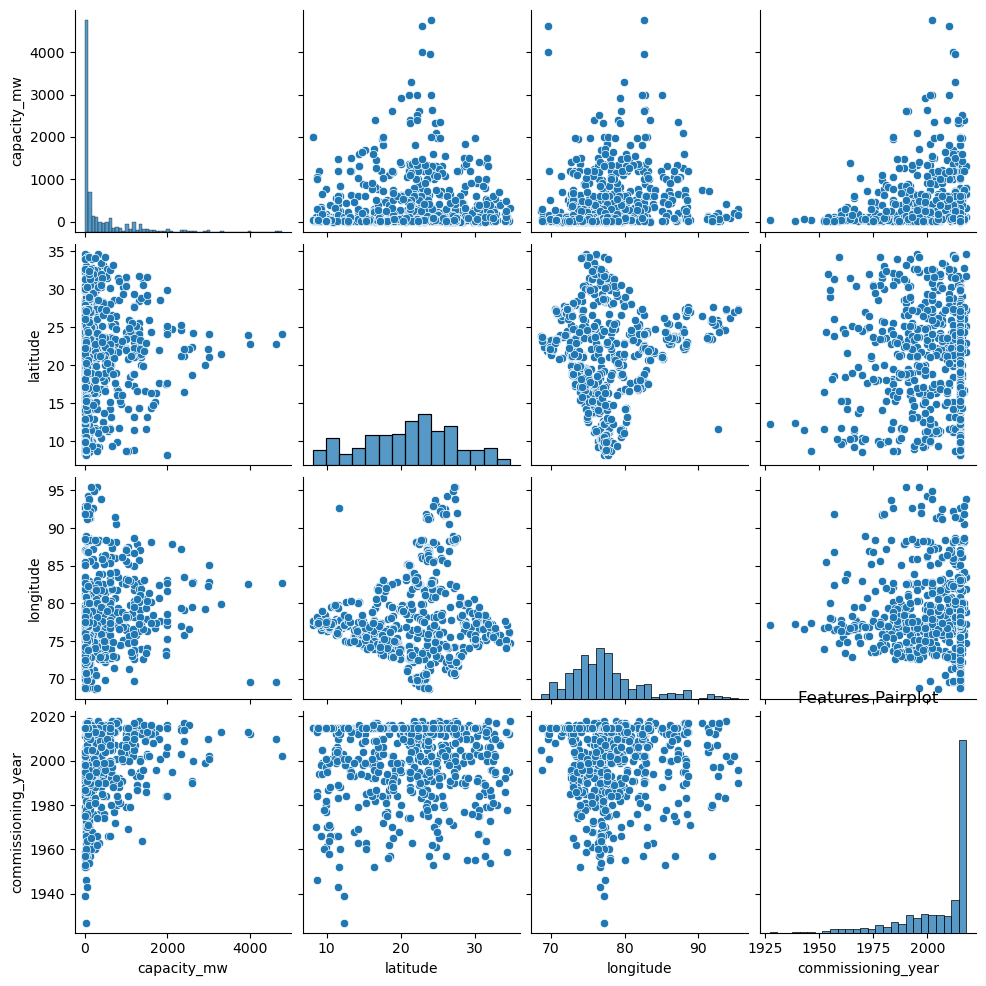

In [37]:
sns.pairplot(df_d)
plt.title('Features Pairplot')
plt.show()

In [38]:
# encode 

lab_en=LabelEncoder()
for col in df_d.columns:
    if col in cat_cols or col =='primary_fuel':
        df_d[col]=lab_en.fit_transform(df_d[col])
df_d.head(5)

,capacity_mw,primary_fuel,name,gppd_idnr,latitude,longitude,commissioning_year,source,geolocation_source
1,2.5,6,0,629,28.1839,73.2407,2011.0,109,1
2,98.0,1,1,492,24.7663,74.6090,2015.0,174,2
3,39.2,7,2,818,21.9038,69.3732,2015.0,21,2
4,135.0,2,3,0,23.8712,91.3602,2004.0,22,2
5,1800.0,1,4,1,21.9603,82.4091,2015.0,22,2


multi

In [ ]:
corr_=df_d.corr()
sns.heatmap(corr_, annot=True)
plt.show()
